In [3]:
from detectUtils import *

In [3]:
def main(root_path, start, end, flip=False):
    D = 65.0
    H1 = 75.0
    H2 = -75.0
    prm = Prm(D, H1, H2)
    
    list_of_centroids = []
    std_dev = [[] for _ in range(3)]
    mean = [[] for _ in range(3)]
    
    for i in range(start, end):
        bgr_img = YUV2BGR(root_path, str(i))
        if flip:
            bgr_img = cv2.rotate(bgr_img, cv2.ROTATE_180)
        centroids_blob, _ = greenBlobDetection(bgr_img)
        list_of_centroids.append(centroids_blob)
    
    for i in range(len(mean)):
        mean[i] = [np.mean([list_of_centroids[j][i][0] for j in range(len(list_of_centroids))]), 
                   np.mean([list_of_centroids[j][i][1] for j in range(len(list_of_centroids))])]
        std_dev[i] = [np.std([list_of_centroids[j][i][0] for j in range(len(list_of_centroids))]), 
                      np.std([list_of_centroids[j][i][1] for j in range(len(list_of_centroids))])]
    
    pyrs = iPb_uv2pyr(mean, prm)
    print("Front side pyrs: ")
    print(pyrs)
    
    return pyrs

In [ ]:
root_path = '9.24_10m'
front_pyrs = main(root_path, 1, 11)
back_pyrs = main(root_path, 11, 21, True)
print(np.array(front_pyrs) - np.array(back_pyrs))

In [ ]:
root_path = '9.25'
front = main(root_path, 1, 6)
back0 = main(root_path, 6, 11)
back1 = main(root_path, 11, 16)
back2 = main(root_path, 16, 21)
print("diff:")
print(np.array(front) - np.array(back0))
print(np.array(front) - np.array(back1))
print(np.array(front) - np.array(back2))

In [ ]:
def distance_to_line(x1, y1, x2, y2):
    A = y2 - y1
    B = x1 - x2
    C = x2 * y1 - x1 * y2
    
    distance = abs(C) / math.sqrt(A**2 + B**2)
    
    return distance

# print(distance_to_line(0.1484375, 388.14404, 8.606689, -379.55518))
# print(distance_to_line(0.29455566, 388.54175, 8.565674, -380.58496))

x1, y1 = 0.1484375, 388.14404
x2, y2 = 8.606689, -379.55518
mid = [(x1 + x2) / 2, (y1 + y2) / 2]
print(mid)
print(np.sqrt(mid[0] ** 2 + mid[1] ** 2))

x1, y1 = 0.29455566, 388.54175
x2, y2 = 8.565674, -380.58496
mid = [(x1 + x2) / 2, (y1 + y2) / 2]
print(mid)
print(np.sqrt(mid[0] ** 2 + mid[1] ** 2))

In [4]:
def main0(root_path, start, end, flip=False):
    list_of_centroids = []
    std_dev = [[] for _ in range(3)]
    mean = [[] for _ in range(3)]
    
    for i in range(start, end):
        bgr_img = YUV2BGR(root_path, str(i))
        if flip:
            bgr_img = cv2.rotate(bgr_img, cv2.ROTATE_180)
        centroids_blob, _ = greenBlobDetection(bgr_img)
        list_of_centroids.append(centroids_blob)
    
    for i in range(len(mean)):
        mean[i] = [np.mean([list_of_centroids[j][i][0] for j in range(len(list_of_centroids))]), 
                   np.mean([list_of_centroids[j][i][1] for j in range(len(list_of_centroids))])]
        # std_dev[i] = [np.std([list_of_centroids[j][i][0] for j in range(len(list_of_centroids))]), 
        #               np.std([list_of_centroids[j][i][1] for j in range(len(list_of_centroids))])]
        
    # print(mean)
    # print(std_dev)
    # print()
    
    return mean

In [10]:
import matplotlib.pyplot as plt

points = [[], [], []]

for i in range(10):
    value = main0('9.26', (5 * i + 1), (5 * i + 6))
    points[0].append(value[2])
    points[1].append(value[0])
    points[2].append(value[1])

In [ ]:
for point in points:
    x = []
    y = []
    plt.figure()
    for p in point:
        x.append(p[0])
        y.append(p[1])
        plt.plot(x, y, linewidth=2)
    
    plt.grid()
    plt.show
    
    slopes = [(y[i+1] - y[i]) / (x[i+1] - x[i]) for i in range(len(x) - 1)]
    average_slope = (sum(slopes) / len(slopes)) * 180 / np.pi
    print(f"average slope: {average_slope} degree")

average slope: -0.20742105053020077 degree
absuolute slope: -0.20119764810414714 degree

average slope: -0.19424005208131595 degree
absuolute slope: -0.18872924906556887 degree

average slope: -0.18829433565290862 degree
absuolute slope: -0.18652043482686612 degree



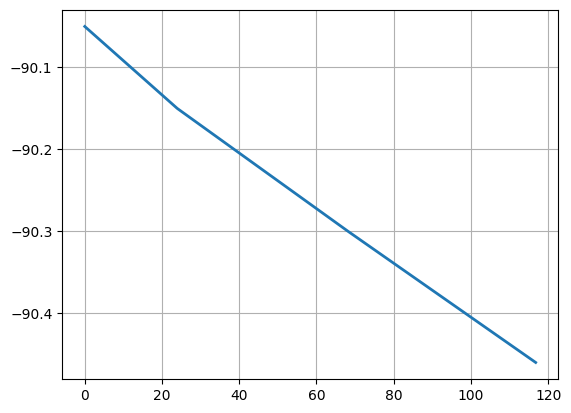

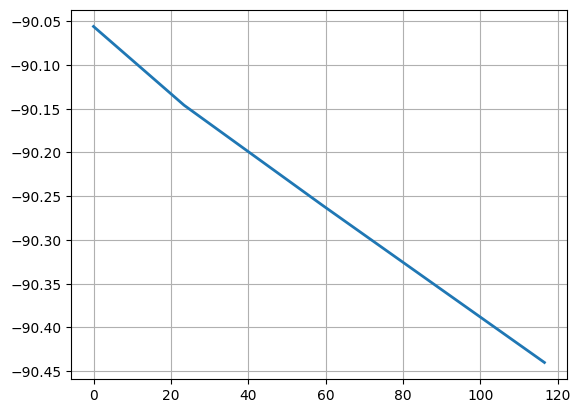

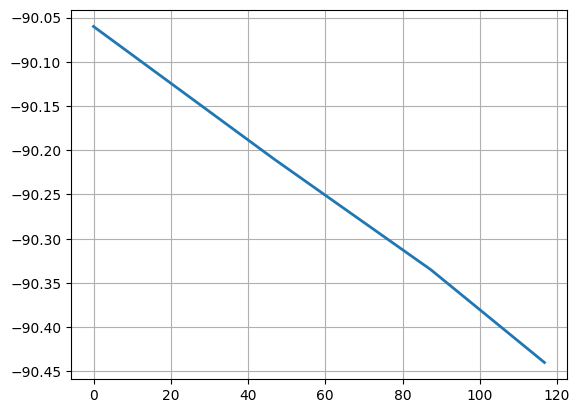

In [32]:
from utils import *
import matplotlib.pyplot as plt

def dist_between_2_points(p1, p2):
    return np.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)

def calc_slope(p, z):
    a = [0, dist_between_2_points(p[0], p[1]), dist_between_2_points(p[0], p[2]), dist_between_2_points(p[0], p[3])]

    plt.figure()
    plt.plot(a, z, linewidth=2)
    plt.grid()
    plt.show

    slopes = [(z[i+1] - z[i]) / (a[i+1] - a[i]) for i in range(len(a) - 1)]
    average_slope = (sum(slopes) / len(slopes)) * 180 / np.pi
    print(f"average slope: {average_slope} degree")
    print(f"absuolute slope: {((z[3] - z[0]) / (a[3] - a[0])) * 180 / np.pi} degree")
    print()

p = [[-346.49, 2221.98], [-322.76, 2225.21], [-278.93, 2231.18], [-230.80, 2237.73]]
z = [-90.05, -90.15, -90.30, -90.46]
calc_slope(p, z)

p = [[-346.29, 2221.95], [-323.09, 2225.13], [-287.75, 2229.95], [-230.78, 2237.69]]
z = [-90.056, -90.146, -90.26, -90.44]
calc_slope(p, z)

p = [[-346.45, 2222.00], [-300.11, 2228.25], [-259.94, 2233.71], [-230.78, 2237.69]]
z = [-90.06, -90.21, -90.335, -90.44]
calc_slope(p, z)

In [29]:
def main1(root_path, start, end, flip=False):
    list_of_centroids = []
    
    for i in range(start, end):
        bgr_img = YUV2BGR(root_path, str(i))
        if flip:
            bgr_img = cv2.rotate(bgr_img, cv2.ROTATE_180)
        centroids_blob, _ = greenBlobDetection(bgr_img)
        list_of_centroids.append(centroids_blob[0])
    
    # for i in range(len(mean)):
    mean = [np.mean([list_of_centroids[j][0] for j in range(len(list_of_centroids))]), 
            np.mean([list_of_centroids[j][1] for j in range(len(list_of_centroids))])]
    
    return mean

average slope: -0.3755097056791589 degree
average slope: -0.36892672209463095 degree
average slope: -0.36858707264300244 degree
average slope: -0.3671952843859907 degree
0.0032155718320093143


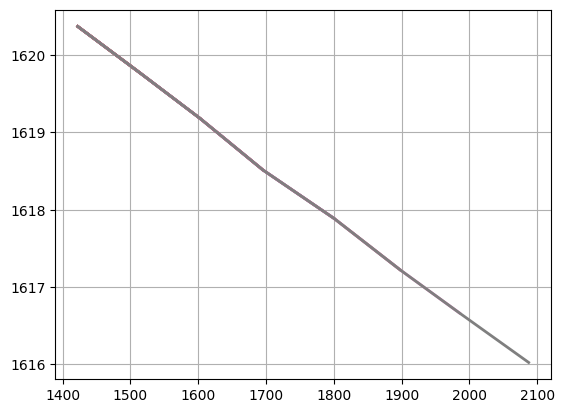

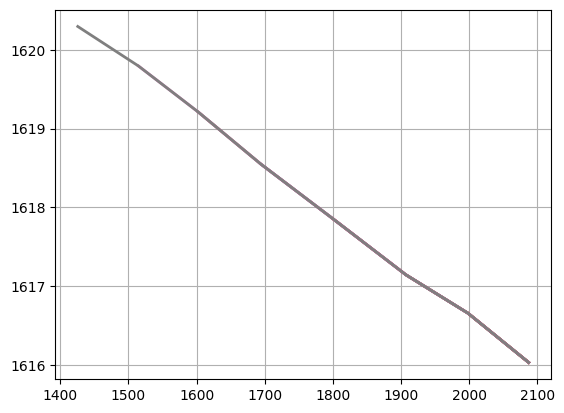

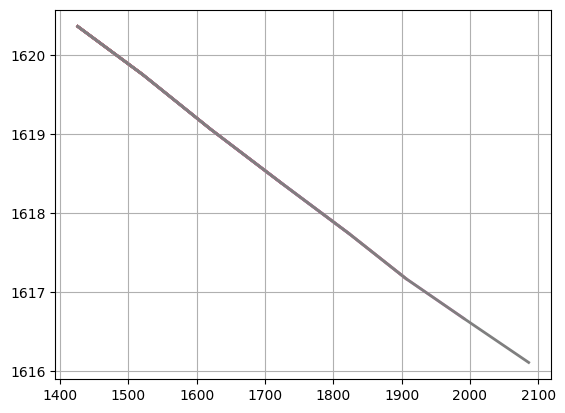

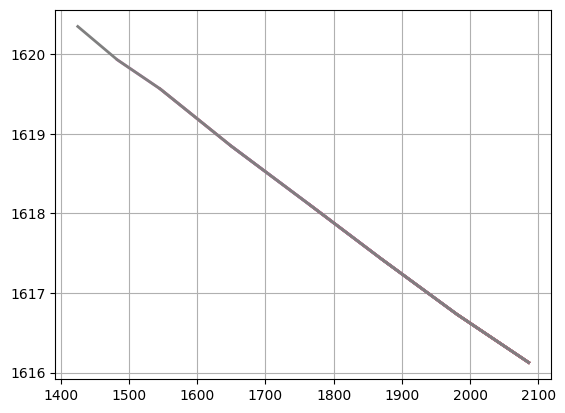

In [33]:
paths = ['9.27/fwd1', '9.27/bwd1', '9.27/fwd2', '9.27/bwd2']
points = [[], [], [], []]

for i in range(4):
    for j in range(8):
        points[i].append(main1(paths[i], (3 * j + 1), (3 * j + 4)))

for point in points:
    x = []
    y = []
    plt.figure()
    for p in point:
        x.append(p[0])
        y.append(p[1])
        plt.plot(x, y, linewidth=2)
    
    plt.grid()
    plt.show
    
    slopes = [(y[i+1] - y[i]) / (x[i+1] - x[i]) for i in range(len(x) - 1)]
    average_slope = (sum(slopes) / len(slopes)) * 180 / np.pi
    print(f"average slope: {average_slope} degree")
    
slopes_list = [-0.3755097056791589, -0.36892672209463095, -0.36858707264300244, -0.3671952843859907]
print(np.std(slopes_list))